# Load data

In [534]:

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [535]:
pwd

'/Users/RK/Google Drive/NYC_DSA/Project3_ML'

In [536]:

train = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Kaggle_DS/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Kaggle_DS/house-prices-advanced-regression-techniques/test.csv')

In [537]:
train.sample

<bound method NDFrame.sample of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [538]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [539]:

train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [540]:
# some scatterplots 
# sns.pairplot(train.loc[:,(train.dtypes == 'int64') | (train.dtypes == 'float64')])

train.loc[:,(train.dtypes == 'int64') | (train.dtypes == 'float64')]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


# Analyze missingness

In [541]:
# Identify missing rows and columns
missingRows = pd.isnull(train).sum(axis=1) > 0
missingCols = pd.isnull(train).sum(axis=0) > 0
print('The columns with missingness are: %s' % (train.columns[missingCols]))
print('Number of rows with missingness are: %s' % (np.sum(missingRows)))

# Need to decide what to do about missing values, coerce to something or discard entire row?

#train = train[~missingRows]
#n[n.isnull().any(axis=1)] # remove rows with missing values

The columns with missingness are: Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
Number of rows with missingness are: 1460


In [542]:
# for columns with missing values, what percent missing?
#pd.isnull(train.columns[missingCols][1]).sum(axis = 0)


# Percentage of missing values in columns that are missing values:
def missingValPercent(col, df):
    val = df[col].isnull().sum()/df.shape[0]*100
    return round(val, 1)

missing_cols = pd.concat([pd.Series(train.columns[missingCols]), pd.Series([missingValPercent(ele, df = train) for ele in train.columns[missingCols]])], axis=1, keys=['column', 'percent_missing'])

missing_cols


,column,percent_missing
0,LotFrontage,17.7
1,Alley,93.8
2,MasVnrType,0.5
3,MasVnrArea,0.5
4,BsmtQual,2.5
...,...,...
14,GarageQual,5.5
15,GarageCond,5.5
16,PoolQC,99.5
17,Fence,80.8


In [543]:
# figure out whats going on with columns containing substantial missing values:

print(train[missing_cols.iloc[1, 0]].value_counts())
# Gravel or paved or none, this might be important to add value
# Change to ordinal: Pave = 2, Grvl = 1, NaN = 0

print(train[missing_cols.iloc[10, 0]].value_counts())
# This is probably important as relates to presence/absence and quality of fireplaces. 
# Change to ordinal: Ex = 5, Gd =4, TA = 3, Fa =2, Po =1, NA =0 

print(train[missing_cols.iloc[16, 0]].value_counts())
# MAYBE REMOVE: This has to do with the quality of the pool for houses with pools. only 7 houses have a value / pools. 


print(train[missing_cols.iloc[17, 0]].value_counts())
# This is fence type, might be important as adds some value. 
# Change to ordinal: GdPrv = 2, GoWo =2, MnPrv= 1, MnWw =1, NA =0 
    
# Checking to see what 'MiscFeatures' include:
print(train[missing_cols.iloc[18, 0]].value_counts())
# Could imagine that having a second garage, etc. might increase property value, might be important. 
# Change to binary: Shed, Gar2, Othr, TenC = 1, NA = 0 


Grvl    50
Pave    41
Name: Alley, dtype: int64
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


# Edit columns and input types

In [544]:
# drop ID column
train.drop(['Id'], axis=1, inplace=True)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [545]:
# MSSubClass: Suggest nominal, should dummify
train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
      ... 
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, Length: 15, dtype: int64

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [546]:
# MSZoning: Suggest nominal, should dummify. only some classifications needed
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

	
LotFrontage: Linear feet of street connected to property

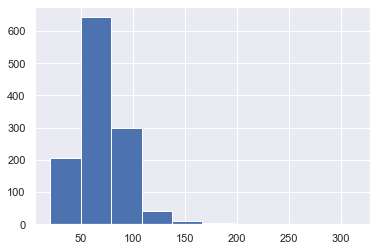

In [547]:
# LotFrontage: Numerical, NO CHANGE, MISSING VALUES EXIST, this could probably be binned
train.LotFrontage.value_counts()
train.LotFrontage.hist(bins=10)

LotArea: Lot size in square feet

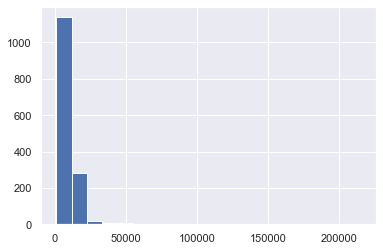

In [548]:
# LotArea: Numerical, NO CHANGE, lot sizes look pretty standardized, could be binned
train.LotArea.hist(bins=20)


Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [549]:
# Street: Suggest nominal or ordinal (eg. Pave =1, Grvl=0)
vals = {'Grvl' : 0 , 'Pave' : 1}
train['Street'] = train['Street'].map(vals)
train['Street']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: Street, Length: 1460, dtype: int64


Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [550]:
# Alley: Large percentage missing values, see above
# Suggest Change to ordinal: Pave = 2, Grvl = 1, NaN = 0
vals = {'Grvl' : 1 , 'Pave' : 2}
train['Alley'] = train['Alley'].map(vals)
train['Alley'].fillna(0, inplace=True)
train['Alley']


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1455    0.0
1456    0.0
1457    0.0
1458    0.0
1459    0.0
Name: Alley, Length: 1460, dtype: float64


LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
 

In [551]:
# LotShape: Suggest nominal or ordinal (eg. Reg =4, IR1=3, IR2=2, IR3=1)
train.LotShape.value_counts()
vals = {'Reg' : 4 , 'IR1' : 3, 'IR2' : 2 , 'IR3' : 1}
train['LotShape'] = train['LotShape'].map(vals)
train['LotShape']

0       4
1       4
2       3
3       3
4       3
       ..
1455    4
1456    4
1457    4
1458    4
1459    4
Name: LotShape, Length: 1460, dtype: int64

      
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
	

In [552]:
# LandContour: Suggest nominal or ordinal (eg. Lvl, Bnk, HLS =1, Low=0)
train.LandContour.value_counts()
vals = {'Lvl' : 1 , 'Bnk' : 1, 'HLS' : 1 , 'Low' : 0}
train['LandContour'] = train['LandContour'].map(vals)
train['LandContour']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: LandContour, Length: 1460, dtype: int64

	
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	

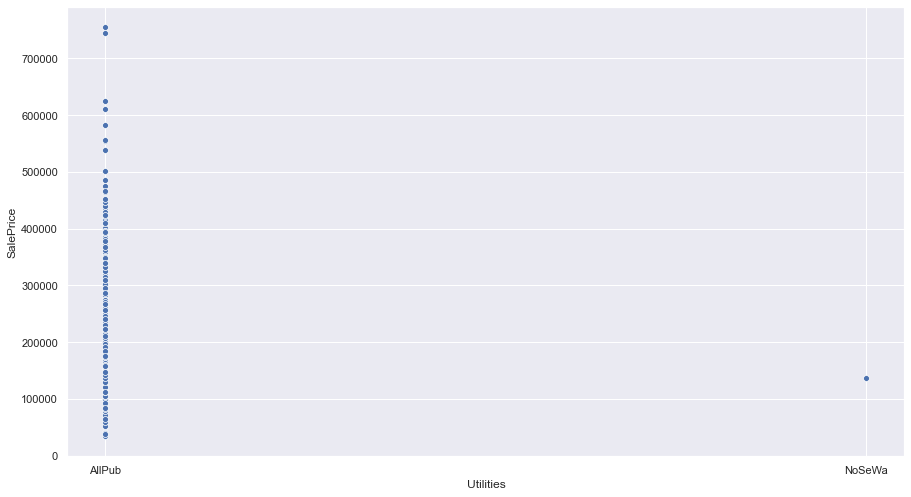

In [553]:
# Utilities:
#train.Utilities.value_counts()
train2 = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Kaggle_DS/house-prices-advanced-regression-techniques/train.csv')
sns.set(rc={'figure.figsize':(15,8.27)})
sns.scatterplot('Utilities','SalePrice', data=train2)
# All are AllPub except one which is NoSeWa
# Suggest to drop input as nearly all the same
#train.drop(['Utilities'], axis=1, inplace=True)

	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [554]:
# LotConfig: nominal, should dummify
train.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [555]:
# LandSlope: nominal, should dummify
train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [556]:
# Neighborhood: nominal, should dummify
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
          ... 
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, Length: 25, dtype: int64

			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [557]:
# Condition1: nominal, should dummify
train.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [558]:
# Condition2: nominal, should dummify
train.Condition2.value_counts()

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [559]:
# BldgType: nominal, should dummify
# TwnhsI = Twnhs
train.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [560]:
# HouseStyle: nominal, should dummify
train.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [561]:
# OverallQual: Numerical/Ordinal, NO CHANGE, maybe could bin
train.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [562]:
# OverallCond: Numerical/ordinal, NO CHANGE, maybe could bin 
train.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

		
YearBuilt: Original construction date

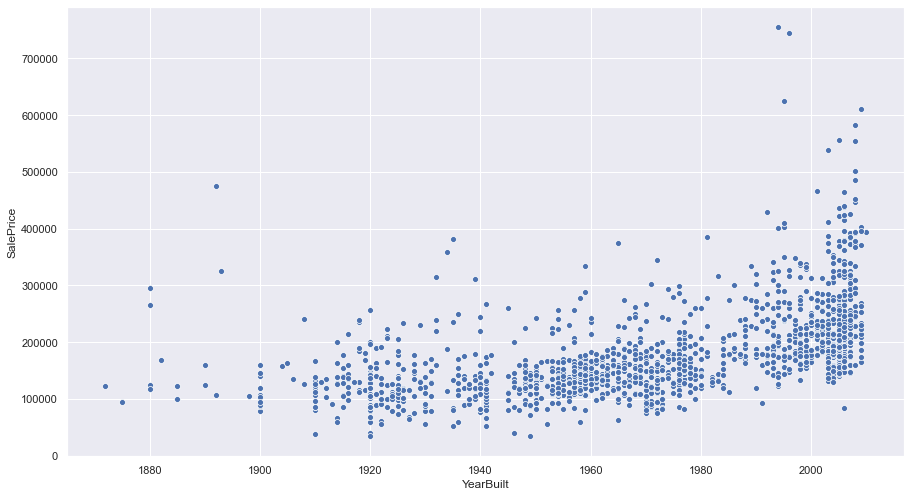

In [563]:
# YearBuilt: Year, Nominal NO CHANGE ??
sns.set(rc={'figure.figsize':(15,8.27)})
sns.scatterplot('YearBuilt','SalePrice', data=train)

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

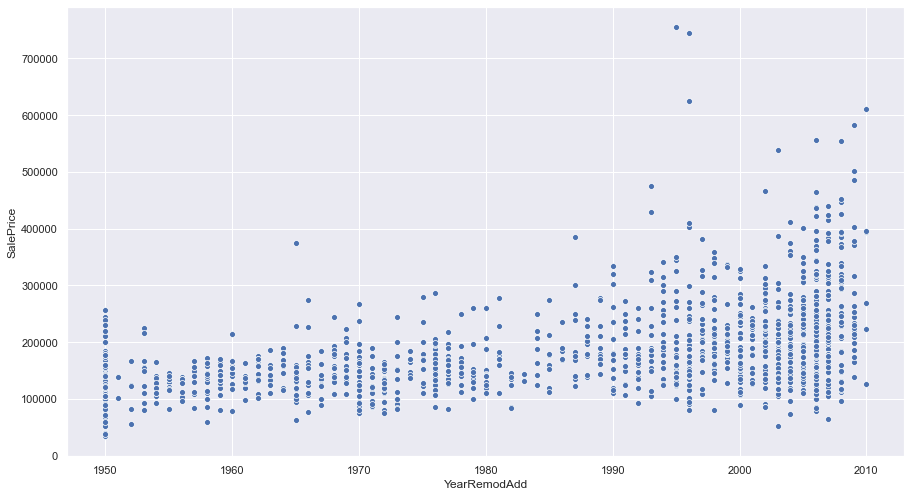

In [564]:
# YearRemodAdd: Year, Nominal NO CHANGE ??
sns.set(rc={'figure.figsize':(15,8.27)})
sns.scatterplot('YearRemodAdd','SalePrice', data=train)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [565]:
# RoofStyle: nominal, should dummify

		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

In [566]:
# RoofMatl: nominal, should dummify

		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [567]:
# Exterior1st: nominal, should dummify

	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [568]:
# Exterior2nd: nominal, should dummify

## 	MasVnrType
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

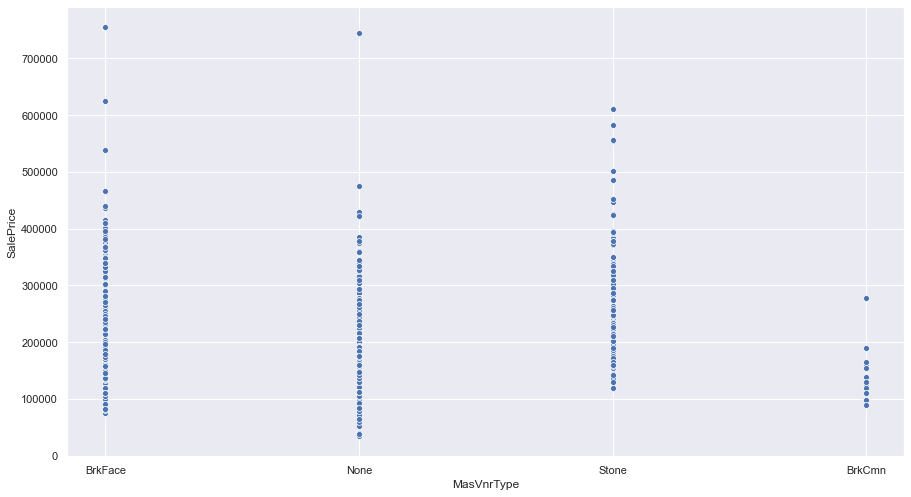

In [569]:
# MasVnrType: nominal, CONTAINS 8 MISSING VALUES
sns.set(rc={'figure.figsize':(15,8.27)})
sns.scatterplot('MasVnrType','SalePrice', data=train)
train.MasVnrType.value_counts()

pd.set_option('display.max_columns', None)
train[pd.isnull(train.MasVnrType)]
# coerce missing values to 'None' 
# as the exterior materials are vinyl siding, wood siding or cement board 
# making Masonry veneer type not applicable.
train['MasVnrType'].fillna('None', inplace=True)

	
MasVnrArea: Masonry veneer area in square feet

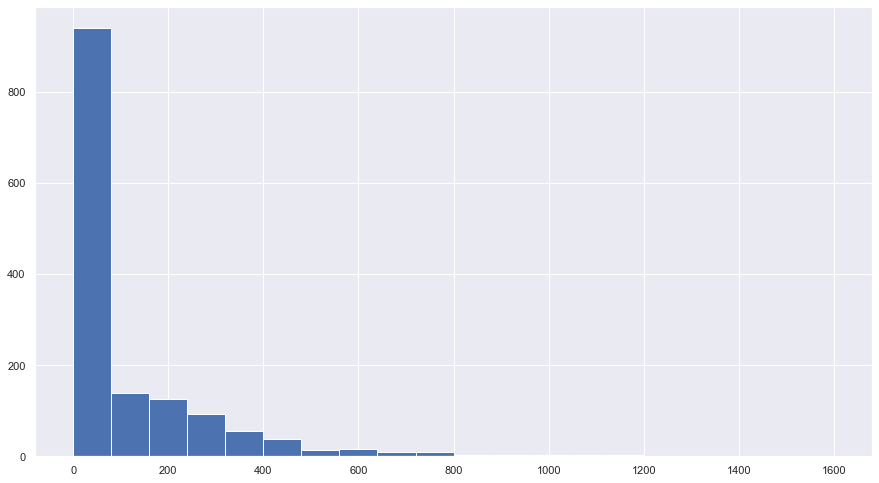

In [570]:
# MasVnrArea: numerical, CONTAINS 8 MISSING VALUES
pd.set_option('display.max_columns', None)
train[pd.isnull(train.MasVnrArea)]
train.MasVnrArea.hist(bins=20)
train.MasVnrArea.value_counts()
# Same rows as above for MasVnrType, # coerce missing values to 0
train['MasVnrArea'].fillna(0, inplace=True)

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [571]:
# ExterQual: change to ordinal (eg. Ex = 5, Gd =4, TA = 3, Fa =2, Po =1)
train.ExterQual.value_counts()
vals = {'Ex' : 5 , 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1}
train['ExterQual'] = train['ExterQual'].map(vals)
train['ExterQual']

0       4
1       3
2       4
3       3
4       4
       ..
1455    3
1456    3
1457    5
1458    3
1459    4
Name: ExterQual, Length: 1460, dtype: int64

		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [572]:
# ExterCond: change to ordinal (eg. Ex = 5, Gd =4, TA = 3, Fa =2, Po =1)
train.ExterCond.value_counts()
vals = {'Ex' : 5 , 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1}
train['ExterCond'] = train['ExterCond'].map(vals)
train['ExterCond']

0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    4
1458    3
1459    3
Name: ExterCond, Length: 1460, dtype: int64

		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [573]:
# Foundation: nominal, NO CHANGE

## 	BsmtQual
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [574]:
# BsmtQual: change to ordinal (eg. Ex = 5, Gd =4, TA = 3, Fa =2, Po =1, NA =0)
# has 37 missing values
train.BsmtQual.value_counts()
pd.set_option('display.max_columns', None)
train[pd.isnull(train.BsmtQual)]
# number of houses without basements
train[train.TotalBsmtSF == 0]
# 37
# these look to be houses without basements, thus missing values should be 
# coerced to 0 (same as NA for no basement)  
# note: it is a bit incorrect to assign houses an ordinal 
# value of 0 for lacking a basement, possibly want to reconsider this in 
# the future but will do it this way for now.
vals = {'Ex' : 5 , 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1, 'NA' : 0}
train['BsmtQual'] = train['BsmtQual'].map(vals)
train['BsmtQual'].fillna(0, inplace=True)
train['BsmtQual']

0       4.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
1455    4.0
1456    4.0
1457    3.0
1458    3.0
1459    3.0
Name: BsmtQual, Length: 1460, dtype: float64

		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [575]:
# BsmtCond: change to ordinal (eg. Ex = 5, Gd =4, TA = 3, Fa =2, Po =1, NA =0)
# has 37 missing values
train.BsmtCond.value_counts()
train[pd.isnull(train.BsmtCond)]
# number of houses without basements
train[train.TotalBsmtSF == 0]
# 37
# these look to be houses without basements, thus missing values should be 
# coerced to 0 (same as NA for no basement)  
# note: it is a bit incorrect to assign houses an ordinal 
# value of 0 for lacking a basement, possibly want to reconsider this in 
# the future but will do it this way for now.
vals = {'Ex' : 5 , 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1, 'NA' : 0}
train['BsmtCond'] = train['BsmtCond'].map(vals)
train['BsmtCond'].fillna(0, inplace=True)
train['BsmtCond']

0       3.0
1       3.0
2       3.0
3       4.0
4       3.0
       ... 
1455    3.0
1456    3.0
1457    4.0
1458    3.0
1459    3.0
Name: BsmtCond, Length: 1460, dtype: float64

	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [576]:
# BsmtExposure: change to ordinal 
# has 38 missing values (1 has an unfinished basement at index 948)
train.BsmtExposure.value_counts()
#train[pd.isnull(train.BsmtExposure)]
# these look to be houses without basements, thus missing values should be 
# coerced to 0 (same as NA for no basement)  
vals = {'Gd' : 4, 'Av' : 3 , 'Mn' : 2, 'No' : 1, 'NA' : 0}
train['BsmtExposure'] = train['BsmtExposure'].map(vals)
train['BsmtExposure'].fillna(0, inplace=True)
# set unfinished basement at index 948 to 'No'/ 1, the most common value
train.BsmtExposure.iloc[948,] = 1
train.BsmtExposure.value_counts()

/Users/RK/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


1.0    954
3.0    221
4.0    134
2.0    114
0.0     37
Name: BsmtExposure, dtype: int64

	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [577]:
# BsmtFinType1: change to ordinal (eg. GLQ = 6, ALQ = 5, BLQ = 4, Rec = 3, LwQ = 2, Unf = 1, NA =0)
train.BsmtFinType1.value_counts()
train[pd.isnull(train.BsmtFinType1)].shape # 37 houses without basements
vals = {'GLQ' : 6, 'ALQ' : 5 , 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0}
train['BsmtFinType1'] = train['BsmtFinType1'].map(vals)
train['BsmtFinType1'].fillna(0, inplace=True)
train.BsmtFinType1.value_counts()

1.0    430
6.0    418
5.0    220
4.0    148
3.0    133
2.0     74
0.0     37
Name: BsmtFinType1, dtype: int64

		
BsmtFinSF1: Type 1 finished square feet

In [578]:
# BsmtFinSF1: numerical, NO CHANGE

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [579]:
# BsmtFinType2: change to ordinal (eg. GLQ = 6, ALQ = 5, BLQ = 4, Rec = 3, LwQ = 2, Unf = 1, NA =0)
train.BsmtFinType2.value_counts()
#train[pd.isnull(train.BsmtFinType2)].shape 
# 37 houses without basements, 1 house with large Totbsmtsqft at index 332
# change this value to be the most common value that is not Unf, as
# there is a separate value for unfinished sqft bsmtunfsqft 1603
# thus make this value Rec / 3
vals = {'GLQ' : 6, 'ALQ' : 5 , 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'NA' : 0}
train['BsmtFinType2'] = train['BsmtFinType2'].map(vals)
train['BsmtFinType2'].fillna(0, inplace=True)
# set strange basement at index 332 to Rec / 3
train.BsmtFinType2.iloc[332,] = 3
train.BsmtFinType2.value_counts()

1.0    1256
3.0      55
2.0      46
0.0      37
4.0      33
5.0      19
6.0      14
Name: BsmtFinType2, dtype: int64

BsmtFinSF2: Type 2 finished square feet

In [580]:
# BsmtFinSF2: numerical, NO CHANGE

BsmtUnfSF: Unfinished square feet of basement area

In [581]:
# BsmtUnfSF: numerical, NO CHANGE.

TotalBsmtSF: Total square feet of basement area

In [582]:
# TotalBsmtSF: numerical, NO CHANGE.

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [583]:
# Heating: change to ordinal (Gas is probably best, followed closely by other sources. 
# Floor, wall and gravity furnaces are inferior, 
# eg. GasA, GasW, OthW = 2; Floor, Grav, Wall = 1)
train.Heating.value_counts()
vals = {'GasA' : 2, 'GasW' : 2 , 'OthW' : 2, 'Floor' : 1, 'Grav' : 1, 'Wall' : 1}
train['Heating'] = train['Heating'].map(vals)
train.Heating.value_counts()

2    1448
1      12
Name: Heating, dtype: int64

		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [584]:
# HeatingQC: change to ordinal (eg. Ex = 5, Gd =4, TA = 3, Fa =2, Po =1)
train.HeatingQC.value_counts()
vals = {'Ex' : 5, 'Gd' : 4 , 'TA' : 3, 'Fa' : 2, 'Po' : 1}
train['HeatingQC'] = train['HeatingQC'].map(vals)
train.HeatingQC.value_counts()

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

		
CentralAir: Central air conditioning

       N	No
       Y	Yes

In [585]:
# CentralAir: change to binary Yes = 1, No = 0
train.CentralAir.value_counts()
vals = {'Y' : 1, 'N' : 0}
train['CentralAir'] = train['CentralAir'].map(vals)
train.CentralAir.value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [586]:
# Electrical: change to ordinal (eg. SBrkr = 4, FuseA =3, FuseF, Mix = 2, FuseP =1), CONTAINS 1 MISSING VALUE
train.Electrical.value_counts()
# train[pd.isnull(train.Electrical)] # index 1379, change to mode value SBrkr
vals = {'SBrkr' : 4, 'FuseA' : 3, 'FuseF': 2, 'Mix': 2, 'FuseP': 1}
train['Electrical'] = train['Electrical'].map(vals)
# index 1379, change to mode value SBrkr
train.Electrical.iloc[1379, ] = 4
train.Electrical.value_counts()

4.0    1335
3.0      94
2.0      28
1.0       3
Name: Electrical, dtype: int64

		
1stFlrSF: First Floor square feet
 

In [587]:
# 1stFlrSF: numerical, NO CHANGE.

2ndFlrSF: Second floor square feet

In [588]:
# 2stFlrSF: numerical, NO CHANGE.

LowQualFinSF: Low quality finished square feet (all floors)

In [589]:
# LowQualFinSF: numerical, NO CHANGE. (Interesting input, likely inverse with value)

GrLivArea: Above grade (ground) living area square feet

In [590]:
# GrLivArea: numerical, NO CHANGE.

BsmtFullBath: Basement full bathrooms

In [591]:
# BsmtFullBath: numerical/ordinal, NO CHANGE.

BsmtHalfBath: Basement half bathrooms

In [592]:
# BsmtHalfBath: numerical/ordinal, NO CHANGE.

FullBath: Full bathrooms above grade

In [593]:
# FullBath: numerical/ordinal, NO CHANGE.

HalfBath: Half baths above grade

In [594]:
# HalfBath: numerical/ordinal, NO CHANGE.

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

In [595]:
# Bedroom: numerical/ordinal, NO CHANGE.

## Kitchen
Kitchen: Kitchens above grade

In [596]:
# Kitchen: numerical/ordinal, NO CHANGE.

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [597]:
# KitchenQual: change to ordinal (eg. Ex = 5, Gd =4, TA = 3, Fa =2, Po =1)
train.KitchenQual.value_counts()
vals = {'Ex' : 5, 'Gd' : 4, 'TA': 3, 'Fa': 2, 'Po': 1}
train['KitchenQual'] = train['KitchenQual'].map(vals)
train.KitchenQual.value_counts()

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [598]:
# TotRmsAbvGrd: numerical/ordinal, NO CHANGE.

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [599]:
# Functional: change to ordinal (eg. Typ = 8, Min1 = 7, Min2 = 6, Mod = 5, Maj1 =4, Maj2 = 3, Sev =2, Sal =1)
train.Functional.value_counts()
train.groupby('Functional')['SalePrice'].mean().sort_values(ascending=False)
vals = {'Typ' : 8, 'Min1' : 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1}
train['Functional'] = train['Functional'].map(vals)
train.Functional.value_counts()

8    1360
6      34
7      31
5      15
4      14
3       5
2       1
Name: Functional, dtype: int64

		
Fireplaces: Number of fireplaces

In [600]:
# Fireplaces: ordinal, NO CHANGE

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [601]:
# FireplaceQu: Change to ordinal: Ex = 5, Gd =4, TA = 3, Fa =2, Po =1, NA =0 
# CONTAINS MISSING VALUES
train.FireplaceQu.value_counts()
train[pd.isnull(train.FireplaceQu)] # 690 without fireplaces to be coerced to NA / 0
vals = {'Ex' : 5 , 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1, 'NA' : 0}
train['FireplaceQu'] = train['FireplaceQu'].map(vals)
train['FireplaceQu'].fillna(0, inplace=True)
train.FireplaceQu.value_counts()

0.0    690
4.0    380
3.0    313
2.0     33
5.0     24
1.0     20
Name: FireplaceQu, dtype: int64

		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [602]:
# GarageType: Change to ordinal: 2Types = 3; Attchd, Basment, BuiltIn = 2; CarPort, Detchd = 1; NA =0 
train.GarageType.value_counts()
train[pd.isnull(train.GarageType)] # 81 missing, without garage to be coerced to NA / 0
vals = {'2Types' : 3 , 'Attchd' : 2, 'Basment' : 2 , 'BuiltIn' : 2, 'CarPort' : 1, 'Detchd' : 1, 'NA' : 0}
train['GarageType'] = train['GarageType'].map(vals)
train['GarageType'].fillna(0, inplace=True)
train.GarageType.value_counts()

2.0    977
1.0    396
0.0     81
3.0      6
Name: GarageType, dtype: int64

## 	GarageYrBlt
GarageYrBlt: Year garage was built

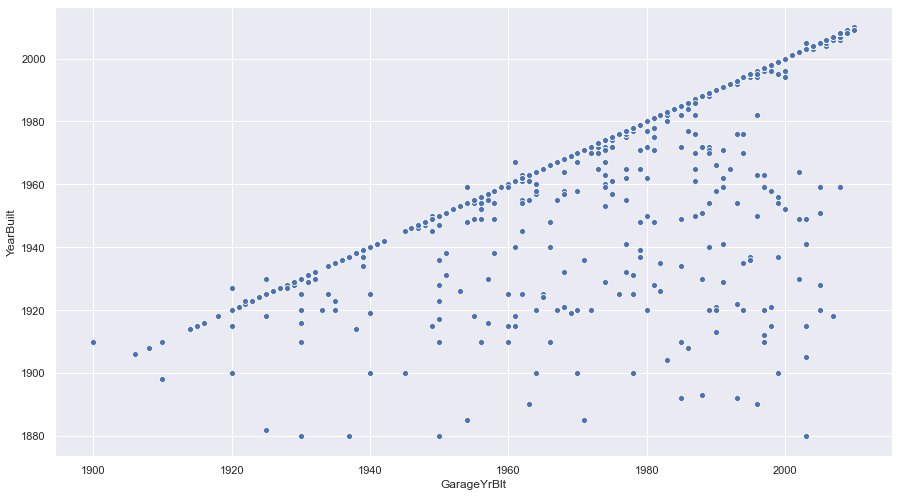

In [603]:
# GarageYrBlt: Year, Nominal, NO CHANGE ?? CONTAINS MISSING VALUES
# also, in most cases this should be the same year as house YearBuilt
train[pd.isnull(train.GarageYrBlt)] # 81 missing, no garage
# probably best to leave missing as NaN
sns.set(rc={'figure.figsize':(15,8.27)})
sns.scatterplot('GarageYrBlt','YearBuilt', data=train)

		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [604]:
# GarageFinish: Change to ordinal: Fin = 3; RFn = 2; Unf = 1; NA =0 
train.GarageFinish.value_counts()
train[pd.isnull(train.GarageFinish)] # 81 missing, no garage
vals = {'Fin' : 3 , 'RFn' : 2, 'Unf' : 1 , 'NA' : 0}
train['GarageFinish'] = train['GarageFinish'].map(vals)
train['GarageFinish'].fillna(0, inplace=True)
train.GarageFinish.value_counts()

1.0    605
2.0    422
3.0    352
0.0     81
Name: GarageFinish, dtype: int64

		
GarageCars: Size of garage in car capacity

In [605]:
# GarageCars: ordinal, NO CHANGE


GarageArea: Size of garage in square feet
- <span class="mark">Thinking that GarageCars and GarageArea are really the same and one of these could be dropped</span>

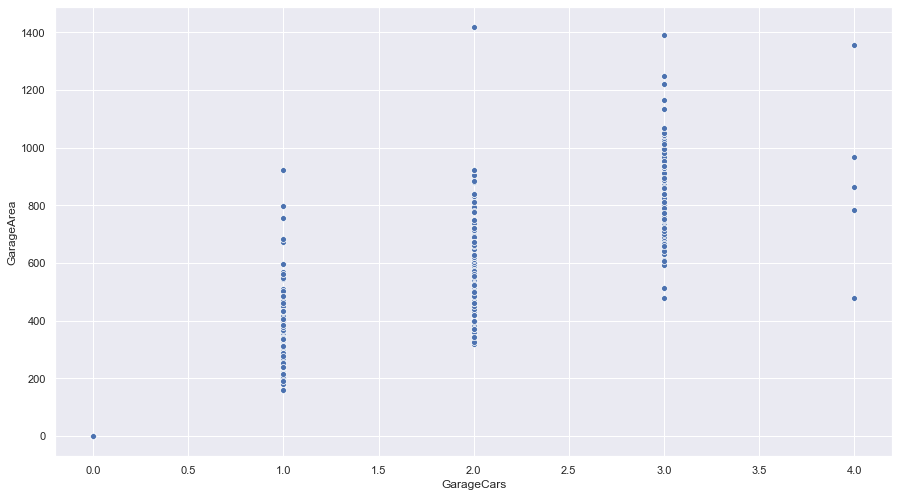

In [606]:
# GarageArea: numerical, NO CHANGE
sns.set(rc={'figure.figsize':(15,8.27)})
sns.scatterplot('GarageCars','GarageArea', data=train)

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [607]:
# GarageQual: Change to ordinal: Ex = 5, Gd =4, TA = 3, Fa =2, Po =1, NA =0 
train.GarageQual.value_counts()
train[pd.isnull(train.GarageQual)] # 81 without garages to be coerced to NA / 0
vals = {'Ex' : 5 , 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1, 'NA' : 0}
train['GarageQual'] = train['GarageQual'].map(vals)
train['GarageQual'].fillna(0, inplace=True)
train.GarageQual.value_counts()

3.0    1311
0.0      81
2.0      48
4.0      14
1.0       3
5.0       3
Name: GarageQual, dtype: int64

		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [608]:
# GarageCond: Change to ordinal: Ex = 5, Gd =4, TA = 3, Fa =2, Po =1, NA =0 
train.GarageCond.value_counts()
train[pd.isnull(train.GarageCond)] # 81 without garages to be coerced to NA / 0
vals = {'Ex' : 5 , 'Gd' : 4, 'TA' : 3 , 'Fa' : 2, 'Po' : 1, 'NA' : 0}
train['GarageCond'] = train['GarageCond'].map(vals)
train['GarageCond'].fillna(0, inplace=True)
train.GarageCond.value_counts()

3.0    1326
0.0      81
2.0      35
4.0       9
1.0       7
5.0       2
Name: GarageCond, dtype: int64

		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [609]:
# PavedDrive: Change to ordinal: Y = 3, P =2, N =1
train.PavedDrive.value_counts()
vals = {'Y' : 3 , 'P' : 2, 'N' : 1 }
train['PavedDrive'] = train['PavedDrive'].map(vals)
train.PavedDrive.value_counts()

3    1340
1      90
2      30
Name: PavedDrive, dtype: int64

		
WoodDeckSF: Wood deck area in square feet

In [610]:
# WoodDeckSF: numerical, NO CHANGE

OpenPorchSF: Open porch area in square feet

In [611]:
# OpenPorchSF: numerical, NO CHANGE

EnclosedPorch: Enclosed porch area in square feet

In [612]:
# EnclosedPorch: numerical, NO CHANGE

3SsnPorch: Three season porch area in square feet

In [613]:
# 3SsnPorch: numerical, NO CHANGE

ScreenPorch: Screen porch area in square feet

In [614]:
# ScreenPorch: numerical, NO CHANGE

PoolArea: Pool area in square feet

In [615]:
# PoolArea: numerical, NO CHANGE
train.PoolArea.value_counts()
# only 7 houses have a pool

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

## PoolQC
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [616]:
# PoolQC: This has to do with the quality of the pool for houses with pools. 
# only 7 houses have a value / pools. 
train.PoolQC.value_counts()
train[pd.isnull(train.PoolQC)] #1453 missing values
vals = {'Ex' : 4 , 'Gd' : 3, 'TA' : 2 , 'Fa' : 1, 'NA' : 0}
train['PoolQC'] = train['PoolQC'].map(vals)
train['PoolQC'].fillna(0, inplace=True)
train.PoolQC.value_counts()

0.0    1453
3.0       3
1.0       2
4.0       2
Name: PoolQC, dtype: int64

		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [618]:
# Fence: Change to ordinal: GdPrv = 2, GdWo =2, MnPrv= 1, MnWw =1, NA =0 
train.Fence.value_counts()
train[pd.isnull(train.Fence)] # 1179 houses lack fences
vals = {'GdPrv' : 2 , 'GdWo' : 2, 'MnPrv' : 1 , 'MnWw' : 1, 'NA' : 0}
train['Fence'] = train['Fence'].map(vals)
train['Fence'].fillna(0, inplace=True)
train.Fence.value_counts()

0.0    1179
1.0     168
2.0     113
Name: Fence, dtype: int64

	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [620]:
# MiscFeature: Change to binary: Shed, Gar2, Othr, TenC = 1, NA = 0 
# Linked to MiscVal, could probably be removed
train.MiscFeature.value_counts() # only 54 houses with features
vals = {'Shed' : 1 , 'Othr' : 1, 'Gar2' : 1 , 'TenC' : 1, 'NA' : 0}
train['MiscFeature'] = train['MiscFeature'].map(vals)
train['MiscFeature'].fillna(0, inplace=True)
train.MiscFeature.value_counts()

0.0    1406
1.0      54
Name: MiscFeature, dtype: int64

		
MiscVal: $Value of miscellaneous feature

In [624]:
# MiscVal: numerical, NO CHANGE
train.MiscVal.value_counts()

0       1408
400       11
500        8
700        5
450        4
        ... 
1300       1
1400       1
350        1
8300       1
54         1
Name: MiscVal, Length: 21, dtype: int64

MoSold: Month Sold (MM)

In [631]:
# MoSold: Month, Nominal, NO CHANGE ??
# Is there any trend between month sold and SalePrice?
# maybe not
#sns.scatterplot('MoSold','SalePrice', data=train)
pd.set_option('display.max_rows', None)
train.groupby('MoSold')['SalePrice'].mean()

MoSold
1     183256.258621
2     177882.000000
3     183253.924528
4     171503.262411
5     172307.269608
6     177395.735178
7     186331.192308
8     184651.827869
9     195683.206349
10    179563.977528
11    192210.911392
12    186518.966102
Name: SalePrice, dtype: float64

YrSold: Year Sold (YYYY)

In [ ]:
# YrSold: Year, Nominal, NO CHANGE ??

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [ ]:
# SaleType: nominal, NO CHANGE

		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [ ]:
# SaleCondition: nominal, NO CHANGE

SalePrice

In [ ]:
# SalePrice: numerical, NO CHANGE

## Save csv

In [632]:
%pwd

'/Users/RK/Google Drive/NYC_DSA/Project3_ML'

In [633]:
train.to_csv('train_clean_RK.csv')

In [634]:
train.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1025,20,RL,70.0,7700,1,0.0,4,1,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3.0,3.0,1.0,2.0,138,3.0,468,276,882,2,3,1,4.0,882,0,0,882,1,0,1,0,3,1,3,5,8,0,0.0,1.0,1980.0,1.0,2,461,3.0,3.0,3,96,0,0,0,0,0,0.0,1.0,0.0,0,3,2007,WD,Normal,112500
833,20,RL,100.0,10004,1,0.0,4,1,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1964,1964,Gable,CompShg,HdBoard,Plywood,BrkFace,180.0,3,3,CBlock,3.0,3.0,1.0,3.0,196,4.0,345,975,1516,2,3,1,4.0,1516,0,0,1516,0,0,1,1,3,1,3,6,8,0,0.0,2.0,1964.0,2.0,2,472,3.0,3.0,3,0,0,0,0,152,0,0.0,0.0,0.0,0,2,2009,WD,Normal,167000
1356,20,RL,NaN,9477,1,0.0,4,1,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1966,1966,Gable,CompShg,HdBoard,HdBoard,BrkFace,65.0,3,3,CBlock,3.0,3.0,1.0,3.0,340,1.0,0,524,864,2,3,1,4.0,892,0,0,892,0,0,1,0,3,1,3,5,8,0,0.0,2.0,1966.0,2.0,1,264,3.0,3.0,3,0,0,0,0,0,0,0.0,2.0,0.0,0,10,2008,WD,Normal,110000
1412,90,RL,60.0,7200,1,0.0,4,1,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,None,0.0,3,3,Slab,0.0,0.0,0.0,0.0,0,0.0,0,0,0,1,2,0,2.0,1040,0,0,1040,0,0,2,0,2,2,3,6,8,0,0.0,1.0,1956.0,1.0,2,420,3.0,3.0,3,0,0,0,0,0,0,0.0,0.0,0.0,0,6,2009,WD,Normal,90000
50,60,RL,NaN,13869,1,0.0,2,1,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,3.0,6.0,182,1.0,0,612,794,2,4,1,4.0,794,676,0,1470,0,1,2,0,3,1,3,6,8,0,0.0,2.0,1997.0,3.0,2,388,3.0,3.0,3,0,75,0,0,0,0,0.0,0.0,0.0,0,7,2007,WD,Normal,177000
